## Ejercicio Extra
Los 21 distritos de Madrid y las distintas poblaciones de la Comunidad tienen una Tasa de Incidencia Acumulada del COVID-19 en los últimos 15 días de un determinado valor. Cada semana la Comunidad de Madrid pubblica dichos datos en formato csv en el Portal de Datos Abiertos.  

Los datos se encuentran en la dirección: https://datos.comunidad.madrid/catalogo/dataset/7da43feb-8d4d-47e0-abd5-3d022d29d09e/resource/f22c3f43-c5d0-41a4-96dc-719214d56968/download/covid19_tia_muni_y_distritos_s.csv  

Haz un estudio de la evolución de de la tasa de incidencia de los distritos y municipios que la semana del 27 de octubre en casos confirmados 14 días pertenecieran al decil más alto.  

Haz un gráfico temporal por mes o semana de los casos confirmados totales.  

Sientete libre para realizar cualquier tipo de estudio del dataset para comentar tus conocimientos.  

Nota puedes hacerlo tanto en R como Python[[1]](#1).  

[1]: Recomendación: hazlo en los dos.

#### 1. Carga de datos y librerias 

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [4]:


datos = pd.read_csv('/home/enrique/neoland/06. clases y Apuntes Python/covid19_tia_muni_y_distritos_s (copia).csv',)

In [5]:
datos


,municipio_distrito,fecha_informe,casos_confirmados_activos_ultimos_14dias,tasa_incidencia_acumulada_activos_ultimos_14dias,casos_confirmados_ultimos_14dias,tasa_incidencia_acumulada_ultimos_14dias,casos_confirmados_totales,tasa_incidencia_acumulada_total,codigo_geometria
0,Madrid-Retiro,2020/11/24 11:07:00,NaN,NaN,303.0,253.0,95.0,5773.0,4838.0
1,Madrid-Salamanca,2020/11/24 11:07:00,NaN,NaN,458.0,313.0,48.0,7160.0,4900.0
2,Madrid-Centro,2020/11/24 11:07:00,NaN,NaN,328.0,243.0,24.0,6979.0,5175.0
3,Madrid-Arganzuela,2020/11/24 11:07:00,NaN,NaN,339.0,220.0,41.0,7520.0,4889.0
4,Madrid-Chamart�n,2020/11/24 11:07:00,NaN,NaN,397.0,272.0,2.0,6779.0,4647.0
...,...,...,...,...,...,...,...,...,...
5340,Getafe,2020/05/26 07:00:00,11.0,6.0,60.0,32.0,72.0,1463.0,797.0
5341,Ribatejada,2020/05/26 07:00:00,NaN,0.0,NaN,0.0,NaN,255.0,43.0
5342,Villaconejos,2020/05/26 07:00:00,NaN,0.0,NaN,0.0,9.0,265.0,64.0
5343,Valdetorres de Jarama,2020/05/26 07:00:00,NaN,0.0,NaN,22.0,24.0,18.0,400.0


In [6]:
datos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5345 entries, 0 to 5344
Data columns (total 9 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   municipio_distrito                                5345 non-null   object 
 1   fecha_informe                                     5345 non-null   object 
 2   casos_confirmados_activos_ultimos_14dias          991 non-null    float64
 3   tasa_incidencia_acumulada_activos_ultimos_14dias  3952 non-null   float64
 4   casos_confirmados_ultimos_14dias                  3053 non-null   float64
 5   tasa_incidencia_acumulada_ultimos_14dias          4967 non-null   float64
 6   casos_confirmados_totales                         4642 non-null   float64
 7   tasa_incidencia_acumulada_total                   5285 non-null   float64
 8   codigo_geometria                                  5219 non-null   float64
dtypes: float64(7), objec

El DataFrame tiene 5345 observaciones y 9 variables, las dos primeras indican el distrio y la fecha del dato, el resto aportan valores numericos sobre los casos de COVID en esos distritos. 

### Estudio de Variables y Visulización de los datos

Se pide revisar la evolución de los municipios que la semana del 27 de octubre estaban en el decil más alto de en casos confirmados en los últimos 14 días. 

In [7]:
# Aunque ya hemos visto en la tabla de info que hay nulos, vamos a representarlos en una tabla: 
datos.isna().sum()
# Para hacer el análisis vamos a estudiar la tasa de incidencia acumulada en los útlimos 14 días, es la que tiene menos nulos de los datos a 14 días. 

municipio_distrito                                     0
fecha_informe                                          0
casos_confirmados_activos_ultimos_14dias            4354
tasa_incidencia_acumulada_activos_ultimos_14dias    1393
casos_confirmados_ultimos_14dias                    2292
tasa_incidencia_acumulada_ultimos_14dias             378
casos_confirmados_totales                            703
tasa_incidencia_acumulada_total                       60
codigo_geometria                                     126
dtype: int64

In [8]:
# hago una copia del DF par hacer modificaciones
datos_bk = datos

### municipio_distrito

In [9]:
datos['municipio_distrito'] # Var categorica string

0               Madrid-Retiro
1            Madrid-Salamanca
2               Madrid-Centro
3           Madrid-Arganzuela
4            Madrid-Chamart�n
                ...          
5340                   Getafe
5341               Ribatejada
5342             Villaconejos
5343    Valdetorres de Jarama
5344       Pozuelo de Alarc�n
Name: municipio_distrito, Length: 5345, dtype: object

In [10]:
len(datos['municipio_distrito'].unique()) # hay 199 valores únicos o distritos. 

199

### fecha_informe

In [11]:
datos['fecha_informe']

0       2020/11/24 11:07:00
1       2020/11/24 11:07:00
2       2020/11/24 11:07:00
3       2020/11/24 11:07:00
4       2020/11/24 11:07:00
               ...         
5340    2020/05/26 07:00:00
5341    2020/05/26 07:00:00
5342    2020/05/26 07:00:00
5343    2020/05/26 07:00:00
5344    2020/05/26 07:00:00
Name: fecha_informe, Length: 5345, dtype: object

La fecha incluye la hora, la cual no nos interesa porque queremos quedarnos solo con las fechas. 

In [12]:
len(datos['fecha_informe'].unique()) # Aun así al revisar los únicos vemos que solo hay 27, lo cual indica que corresponde a la fecha semanal

27

In [13]:
datos['fecha_informe'] = pd.to_datetime(datos['fecha_informe'])# Convierto a formato date

In [14]:
# Genero una nueva variable que sea la semana del año 
datos['semana'] = datos['fecha_informe'] # he creado esto antes porque me daba error dentro del For. 
for i in range(0, len(datos['fecha_informe'])):
    datos['semana'][i] = datos['fecha_informe'][i].isocalendar()[1]
datos

,municipio_distrito,fecha_informe,casos_confirmados_activos_ultimos_14dias,tasa_incidencia_acumulada_activos_ultimos_14dias,casos_confirmados_ultimos_14dias,tasa_incidencia_acumulada_ultimos_14dias,casos_confirmados_totales,tasa_incidencia_acumulada_total,codigo_geometria,semana
0,Madrid-Retiro,2020-11-24 11:07:00,NaN,NaN,303.0,253.0,95.0,5773.0,4838.0,48
1,Madrid-Salamanca,2020-11-24 11:07:00,NaN,NaN,458.0,313.0,48.0,7160.0,4900.0,48
2,Madrid-Centro,2020-11-24 11:07:00,NaN,NaN,328.0,243.0,24.0,6979.0,5175.0,48
3,Madrid-Arganzuela,2020-11-24 11:07:00,NaN,NaN,339.0,220.0,41.0,7520.0,4889.0,48
4,Madrid-Chamart�n,2020-11-24 11:07:00,NaN,NaN,397.0,272.0,2.0,6779.0,4647.0,48
...,...,...,...,...,...,...,...,...,...,...
5340,Getafe,2020-05-26 07:00:00,11.0,6.0,60.0,32.0,72.0,1463.0,797.0,22
5341,Ribatejada,2020-05-26 07:00:00,NaN,0.0,NaN,0.0,NaN,255.0,43.0,22
5342,Villaconejos,2020-05-26 07:00:00,NaN,0.0,NaN,0.0,9.0,265.0,64.0,22
5343,Valdetorres de Jarama,2020-05-26 07:00:00,NaN,0.0,NaN,22.0,24.0,18.0,400.0,22


In [15]:
datos

,municipio_distrito,fecha_informe,casos_confirmados_activos_ultimos_14dias,tasa_incidencia_acumulada_activos_ultimos_14dias,casos_confirmados_ultimos_14dias,tasa_incidencia_acumulada_ultimos_14dias,casos_confirmados_totales,tasa_incidencia_acumulada_total,codigo_geometria,semana
0,Madrid-Retiro,2020-11-24 11:07:00,NaN,NaN,303.0,253.0,95.0,5773.0,4838.0,48
1,Madrid-Salamanca,2020-11-24 11:07:00,NaN,NaN,458.0,313.0,48.0,7160.0,4900.0,48
2,Madrid-Centro,2020-11-24 11:07:00,NaN,NaN,328.0,243.0,24.0,6979.0,5175.0,48
3,Madrid-Arganzuela,2020-11-24 11:07:00,NaN,NaN,339.0,220.0,41.0,7520.0,4889.0,48
4,Madrid-Chamart�n,2020-11-24 11:07:00,NaN,NaN,397.0,272.0,2.0,6779.0,4647.0,48
...,...,...,...,...,...,...,...,...,...,...
5340,Getafe,2020-05-26 07:00:00,11.0,6.0,60.0,32.0,72.0,1463.0,797.0,22
5341,Ribatejada,2020-05-26 07:00:00,NaN,0.0,NaN,0.0,NaN,255.0,43.0,22
5342,Villaconejos,2020-05-26 07:00:00,NaN,0.0,NaN,0.0,9.0,265.0,64.0,22
5343,Valdetorres de Jarama,2020-05-26 07:00:00,NaN,0.0,NaN,22.0,24.0,18.0,400.0,22


### tasa_incidencia_acumulada_ultimos_14dias


In [16]:
datos['tasa_incidencia_acumulada_ultimos_14dias'].describe()

count     4967.000000
mean       192.199114
std        436.686491
min          0.000000
25%          0.000000
50%         33.000000
75%        277.000000
max      17073.000000
Name: tasa_incidencia_acumulada_ultimos_14dias, dtype: float64

Podemos ver como la media se situa en torno a 192 y tiene una desviación típica de 436 lo cual indica una gran dispersión. También sabemos que hay nulos. Los eliminaré en el siguiente paso. 

### DataFrame con la incidencia acumulada

Voy a crear un DF con las variables que me pide. 

In [17]:
incidencia_14 = datos[['municipio_distrito', 'fecha_informe','semana','tasa_incidencia_acumulada_ultimos_14dias']]
incidencia_14

,municipio_distrito,fecha_informe,semana,tasa_incidencia_acumulada_ultimos_14dias
0,Madrid-Retiro,2020-11-24 11:07:00,48,253.0
1,Madrid-Salamanca,2020-11-24 11:07:00,48,313.0
2,Madrid-Centro,2020-11-24 11:07:00,48,243.0
3,Madrid-Arganzuela,2020-11-24 11:07:00,48,220.0
4,Madrid-Chamart�n,2020-11-24 11:07:00,48,272.0
...,...,...,...,...
5340,Getafe,2020-05-26 07:00:00,22,32.0
5341,Ribatejada,2020-05-26 07:00:00,22,0.0
5342,Villaconejos,2020-05-26 07:00:00,22,0.0
5343,Valdetorres de Jarama,2020-05-26 07:00:00,22,22.0


In [18]:
# Revisión de valores nulos en la tasa de incidencia. Voy a ver si dichos nulos se dan en municipios concretos o en fechas concretas. 
sum(incidencia_14.tasa_incidencia_acumulada_ultimos_14dias.isna()) # hay 378 nulos

378

In [19]:
incidencia_14['nulos'] = incidencia_14.tasa_incidencia_acumulada_ultimos_14dias.isna()
incidencia_14

,municipio_distrito,fecha_informe,semana,tasa_incidencia_acumulada_ultimos_14dias,nulos
0,Madrid-Retiro,2020-11-24 11:07:00,48,253.0,False
1,Madrid-Salamanca,2020-11-24 11:07:00,48,313.0,False
2,Madrid-Centro,2020-11-24 11:07:00,48,243.0,False
3,Madrid-Arganzuela,2020-11-24 11:07:00,48,220.0,False
4,Madrid-Chamart�n,2020-11-24 11:07:00,48,272.0,False
...,...,...,...,...,...
5340,Getafe,2020-05-26 07:00:00,22,32.0,False
5341,Ribatejada,2020-05-26 07:00:00,22,0.0,False
5342,Villaconejos,2020-05-26 07:00:00,22,0.0,False
5343,Valdetorres de Jarama,2020-05-26 07:00:00,22,22.0,False


In [20]:
# nulos según la fecha: 
incidencia_14[['semana', 'nulos']].groupby(['semana']).sum()

,nulos
semana,
22,23.0
23,22.0
24,24.0
25,24.0
26,19.0
27,23.0
28,17.0
29,21.0
30,24.0


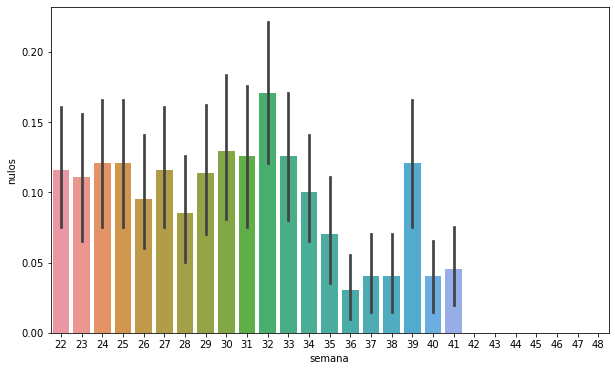

In [21]:
plt.figure(figsize = [10.0,6.0]) # con esto cambiamos el tamaño del gráfico. 
sns.barplot(x = 'semana',
           y = 'nulos',
            data = incidencia_14)

En rl gráfico observamos que hay durante toda la serie valores nulos pero hacia al final de la serie temporal desaparecen, esto indica que se ha mejorado la forma de presentar los datos. 

In [70]:
# hago los mismo con los distritos
incidencia_14[['municipio_distrito', 'nulos']].groupby(['municipio_distrito']).sum().sort_values('nulos', ascending = False)

,nulos
municipio_distrito,
Gri��n,10.0
Villarejo de Salvan�s,8.0
Bustarviejo,7.0
Valdilecha,7.0
San Mart�n de Valdeiglesias,7.0
...,...
Madarcos,0.0
Madrid-Arganzuela,0.0
Collado Villalba,0.0


Hay un máximo de 10 nulos por distrito. Lo represento también en un gráfico. 

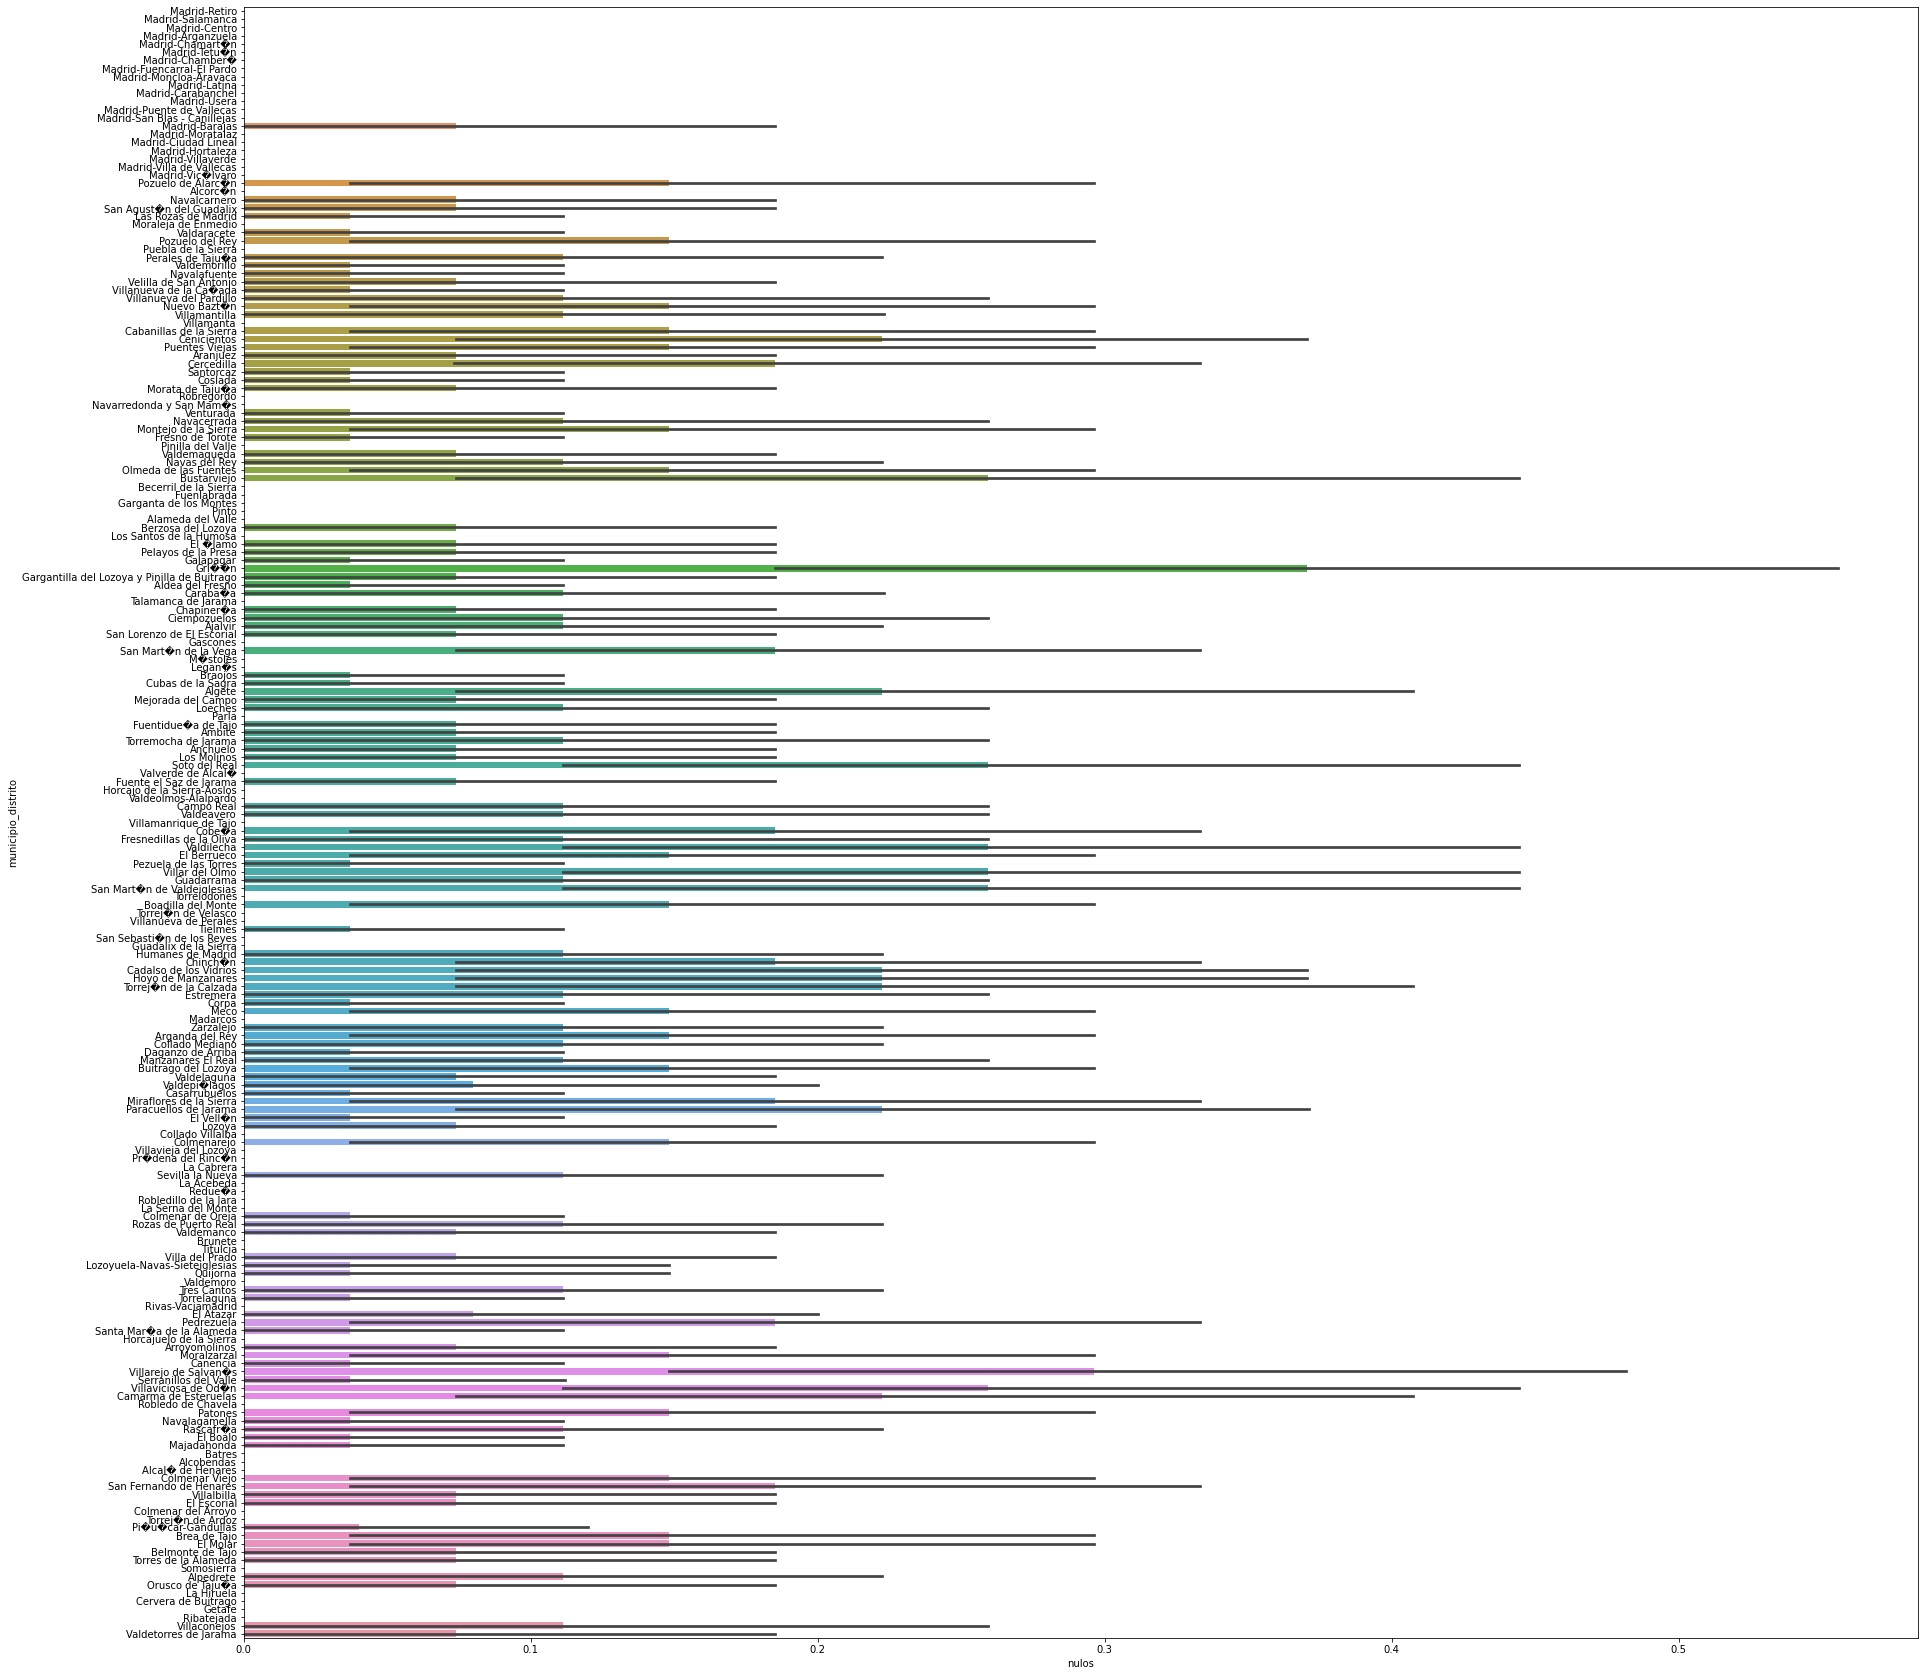

In [23]:
plt.figure(figsize = [30,30]) 
sns.barplot(x = 'nulos',
            y = 'municipio_distrito',
            data = incidencia_14)


### Obtención valores decil superior semana 27-10-2020
Sobre los casos confirmados

In [24]:
# semana 27 -10- 2020
datetime.date(2020,10,27).isocalendar()[1]
# es la semana 44

44

In [25]:
# Hago el filtro sobre datos porque en incidencia 14 días no he cargado los casos confirmados
np.percentile(datos['casos_confirmados_ultimos_14dias'][datos['semana'] == 44], 90)
# me da error porque en el conjunto de datos hay nulos. 

nan

In [26]:
datos['casos_confirmados_ultimos_14dias'][datos['casos_confirmados_ultimos_14dias'].notnull()][datos['semana'] == 44] 
# semana 44 sin nulos

796    424.0
797    600.0
798    496.0
799    524.0
800    577.0
       ...  
984     71.0
988    559.0
990     12.0
991     11.0
994    366.0
Name: casos_confirmados_ultimos_14dias, Length: 140, dtype: float64

In [27]:
#vuelvo a hacer l percentil 
np.percentile(datos['casos_confirmados_ultimos_14dias'][datos['casos_confirmados_ultimos_14dias'].notnull()][datos['semana'] == 44] , 90)

577.6

El resultado es 577.6

In [28]:
# Aplicamos ahora ese filtro para obtener los municipios
municipios = datos['municipio_distrito'][datos['casos_confirmados_ultimos_14dias'] > 577.6][datos['semana'] == 44]
municipios = municipios.unique()
municipios
len(municipios)

14

In [29]:
incidencia_14_top_distritos = incidencia_14[incidencia_14['municipio_distrito'].isin(municipios)] 
incidencia_14_top_distritos

,municipio_distrito,fecha_informe,semana,tasa_incidencia_acumulada_ultimos_14dias,nulos
1,Madrid-Salamanca,2020-11-24 11:07:00,48,313.0,False
5,Madrid-Tetu�n,2020-11-24 11:07:00,48,236.0,False
6,Madrid-Chamber�,2020-11-24 11:07:00,48,327.0,False
7,Madrid-Fuencarral-El Pardo,2020-11-24 11:07:00,48,284.0,False
8,Madrid-Moncloa-Aravaca,2020-11-24 11:07:00,48,337.0,False
...,...,...,...,...,...
5163,Madrid-Hortaleza,2020-05-26 07:00:00,22,43.0,False
5164,Madrid-Villaverde,2020-05-26 07:00:00,22,37.0,False
5204,Fuenlabrada,2020-05-26 07:00:00,22,41.0,False
5224,M�stoles,2020-05-26 07:00:00,22,50.0,False


In [30]:
incidencia_14_top_distritos =incidencia_14_top_distritos.dropna() # Elimino los nulos del Df con los distritos del percentil más alto. 
incidencia_14_top_distritos.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378 entries, 1 to 5323
Data columns (total 5 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   municipio_distrito                        378 non-null    object        
 1   fecha_informe                             378 non-null    datetime64[ns]
 2   semana                                    378 non-null    object        
 3   tasa_incidencia_acumulada_ultimos_14dias  378 non-null    float64       
 4   nulos                                     378 non-null    bool          
dtypes: bool(1), datetime64[ns](1), float64(1), object(2)
memory usage: 15.1+ KB


In [31]:
incidencia_14_top_distritos.drop('nulos', axis=1, inplace=True) # Quito la columna que nulos. 
incidencia_14_top_distritos

,municipio_distrito,fecha_informe,semana,tasa_incidencia_acumulada_ultimos_14dias
1,Madrid-Salamanca,2020-11-24 11:07:00,48,313.0
5,Madrid-Tetu�n,2020-11-24 11:07:00,48,236.0
6,Madrid-Chamber�,2020-11-24 11:07:00,48,327.0
7,Madrid-Fuencarral-El Pardo,2020-11-24 11:07:00,48,284.0
8,Madrid-Moncloa-Aravaca,2020-11-24 11:07:00,48,337.0
...,...,...,...,...
5163,Madrid-Hortaleza,2020-05-26 07:00:00,22,43.0
5164,Madrid-Villaverde,2020-05-26 07:00:00,22,37.0
5204,Fuenlabrada,2020-05-26 07:00:00,22,41.0
5224,M�stoles,2020-05-26 07:00:00,22,50.0


### Representación por distrito de la evolución del COVID


In [32]:
municipios

array(['Madrid-Salamanca', 'Madrid-Tetu�n', 'Madrid-Chamber�',
       'Madrid-Fuencarral-El Pardo', 'Madrid-Moncloa-Aravaca',
       'Madrid-Latina', 'Madrid-Carabanchel', 'Madrid-Puente de Vallecas',
       'Madrid-Ciudad Lineal', 'Madrid-Hortaleza', 'Madrid-Villaverde',
       'Fuenlabrada', 'M�stoles', 'Alcal� de Henares'], dtype=object)

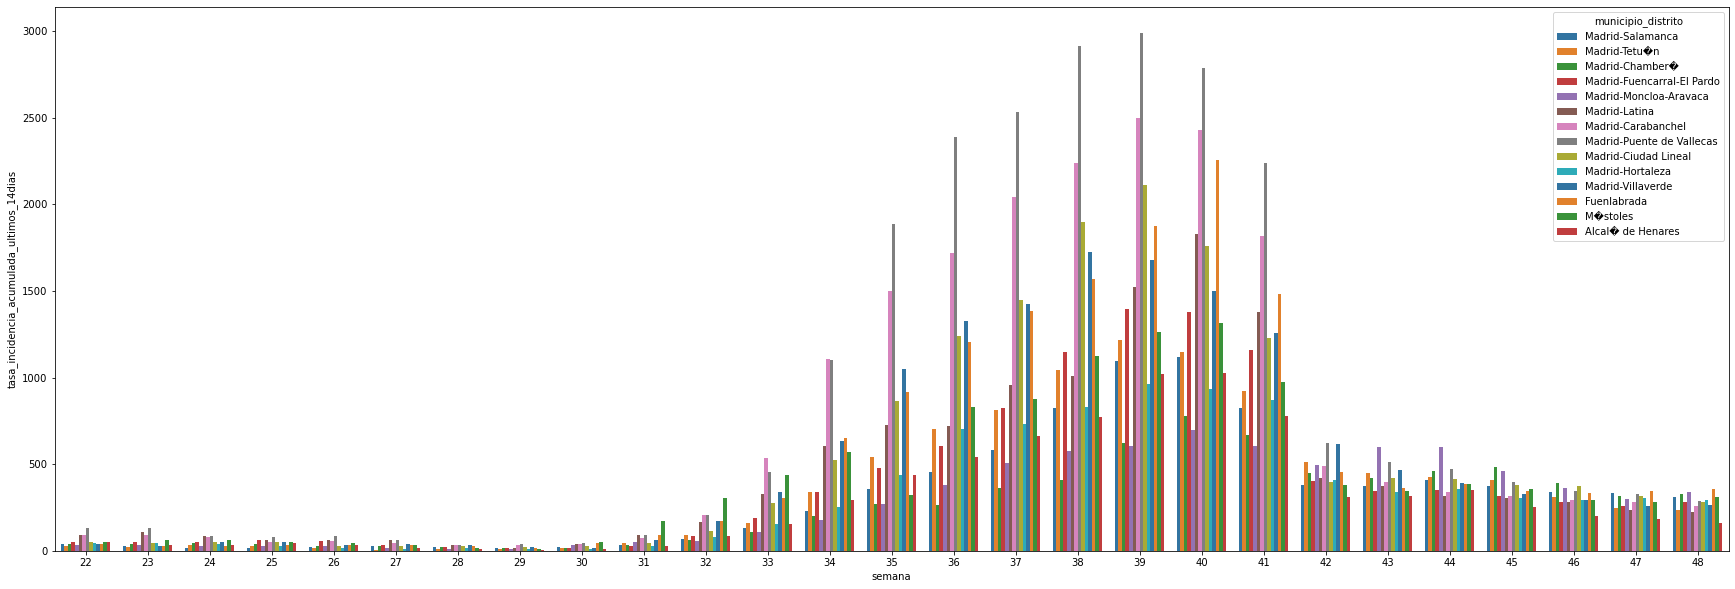

In [33]:
# Representamos todos los valores juntos en una gráfica para ver si tienen relación en la evolución de la incidencia y si han seguido tendencias similares
plt.figure(figsize = [30,10]) 
sns.barplot(x = 'semana',
            y = 'tasa_incidencia_acumulada_ultimos_14dias',
            hue = 'municipio_distrito',
            data = incidencia_14_top_distritos,
            palette='tab10')

Se observa como la evolución de la curva sigue una tendencia similar en todos los distritos con picos en las semanas 37, 38, 39 y 40, y a partir de ahí descensos. También destaca como la incidencia es bastante dispar entre los diferentes distritos viniendo de una situación similar (semana 30).  
En un primer momento era móstoles (semanas 31 y 32) el distrito que empezaba el repunte, pero en seguido los distritos de Madrid - Carbanchel, Puente de Vallecas y Ciudad Lineal.  
Llama la atención como Fuenlabrada llega a su pico en la semana 40 cuando los otros tres distritos anteriormente nombrados llegan a su pico. 
Lo que si parece algo generalizado es el descenso muy pronunciado que se produce de la semana 41 a 42. A partir de ese momento se estabiliza y sufre un ligero descenso. 

In [34]:
maxdistrito = incidencia_14_top_distritos[['municipio_distrito','semana','tasa_incidencia_acumulada_ultimos_14dias']].groupby(['municipio_distrito'], as_index=False)['tasa_incidencia_acumulada_ultimos_14dias'].max()
maxdistrito

,municipio_distrito,tasa_incidencia_acumulada_ultimos_14dias
0,Alcal� de Henares,1027.0
1,Fuenlabrada,2258.0
2,Madrid-Carabanchel,2496.0
3,Madrid-Chamber�,778.0
4,Madrid-Ciudad Lineal,2112.0
5,Madrid-Fuencarral-El Pardo,1395.0
6,Madrid-Hortaleza,962.0
7,Madrid-Latina,1828.0
8,Madrid-Moncloa-Aravaca,698.0
9,Madrid-Puente de Vallecas,2988.0


#### Madrid-Salamanca

In [35]:
Madrid_Salamanca = incidencia_14_top_distritos[incidencia_14_top_distritos['municipio_distrito'] == 'Madrid-Salamanca']
Madrid_Salamanca

,municipio_distrito,fecha_informe,semana,tasa_incidencia_acumulada_ultimos_14dias
1,Madrid-Salamanca,2020-11-24 11:07:00,48,313.0
200,Madrid-Salamanca,2020-11-17 12:22:00,47,331.0
399,Madrid-Salamanca,2020-11-10 10:27:00,46,341.0
598,Madrid-Salamanca,2020-11-03 10:02:00,45,374.0
797,Madrid-Salamanca,2020-10-27 10:02:00,44,410.0
996,Madrid-Salamanca,2020-10-20 11:06:00,43,372.0
1195,Madrid-Salamanca,2020-10-13 13:31:00,42,377.0
1394,Madrid-Salamanca,2020-10-06 11:02:00,41,825.0
1593,Madrid-Salamanca,2020-09-29 11:15:00,40,1120.0
1792,Madrid-Salamanca,2020-09-22 09:42:00,39,1097.0


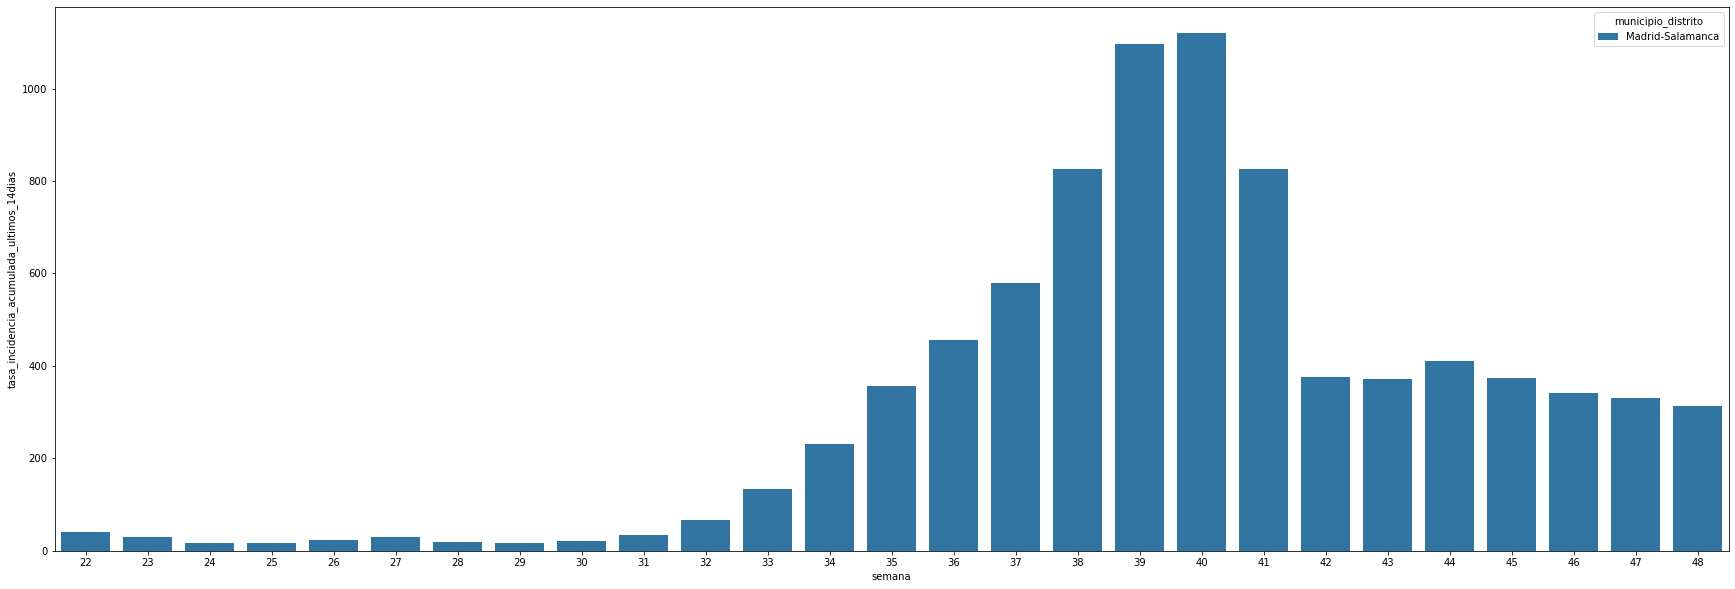

In [36]:
plt.figure(figsize = [30,10]) 
sns.barplot(x = 'semana',
            y = 'tasa_incidencia_acumulada_ultimos_14dias',
            hue = 'municipio_distrito',
            data = Madrid_Salamanca,
            palette='tab10')

#### Madrid-Tetuan


In [37]:
Madrid_Tetuan = incidencia_14_top_distritos[incidencia_14_top_distritos['municipio_distrito'] == 'Madrid-Tetu�n']
Madrid_Tetuan

,municipio_distrito,fecha_informe,semana,tasa_incidencia_acumulada_ultimos_14dias
5,Madrid-Tetu�n,2020-11-24 11:07:00,48,236.0
204,Madrid-Tetu�n,2020-11-17 12:22:00,47,249.0
403,Madrid-Tetu�n,2020-11-10 10:27:00,46,313.0
602,Madrid-Tetu�n,2020-11-03 10:02:00,45,410.0
801,Madrid-Tetu�n,2020-10-27 10:02:00,44,425.0
1000,Madrid-Tetu�n,2020-10-20 11:06:00,43,448.0
1199,Madrid-Tetu�n,2020-10-13 13:31:00,42,512.0
1398,Madrid-Tetu�n,2020-10-06 11:02:00,41,921.0
1597,Madrid-Tetu�n,2020-09-29 11:15:00,40,1150.0
1796,Madrid-Tetu�n,2020-09-22 09:42:00,39,1216.0


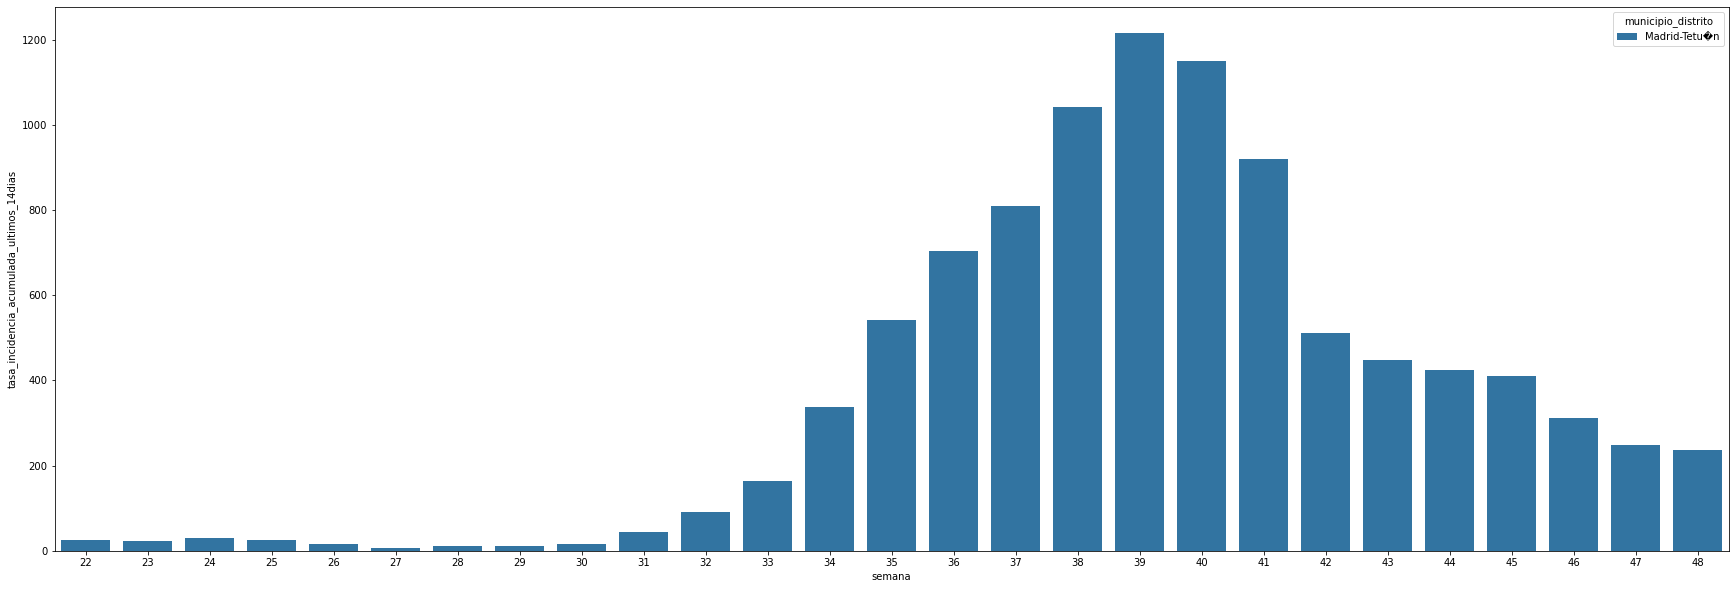

In [38]:
plt.figure(figsize = [30,10]) 
sns.barplot(x = 'semana',
            y = 'tasa_incidencia_acumulada_ultimos_14dias',
            hue = 'municipio_distrito',
            data = Madrid_Tetuan,
            palette='tab10')

#### Madrid-Chamber�

In [39]:
Madrid_Chamberi = incidencia_14_top_distritos[incidencia_14_top_distritos['municipio_distrito'] == 'Madrid-Chamber�']
Madrid_Chamberi

,municipio_distrito,fecha_informe,semana,tasa_incidencia_acumulada_ultimos_14dias
6,Madrid-Chamber�,2020-11-24 11:07:00,48,327.0
205,Madrid-Chamber�,2020-11-17 12:22:00,47,317.0
404,Madrid-Chamber�,2020-11-10 10:27:00,46,391.0
603,Madrid-Chamber�,2020-11-03 10:02:00,45,481.0
802,Madrid-Chamber�,2020-10-27 10:02:00,44,459.0
1001,Madrid-Chamber�,2020-10-20 11:06:00,43,419.0
1200,Madrid-Chamber�,2020-10-13 13:31:00,42,451.0
1399,Madrid-Chamber�,2020-10-06 11:02:00,41,671.0
1598,Madrid-Chamber�,2020-09-29 11:15:00,40,778.0
1797,Madrid-Chamber�,2020-09-22 09:42:00,39,625.0


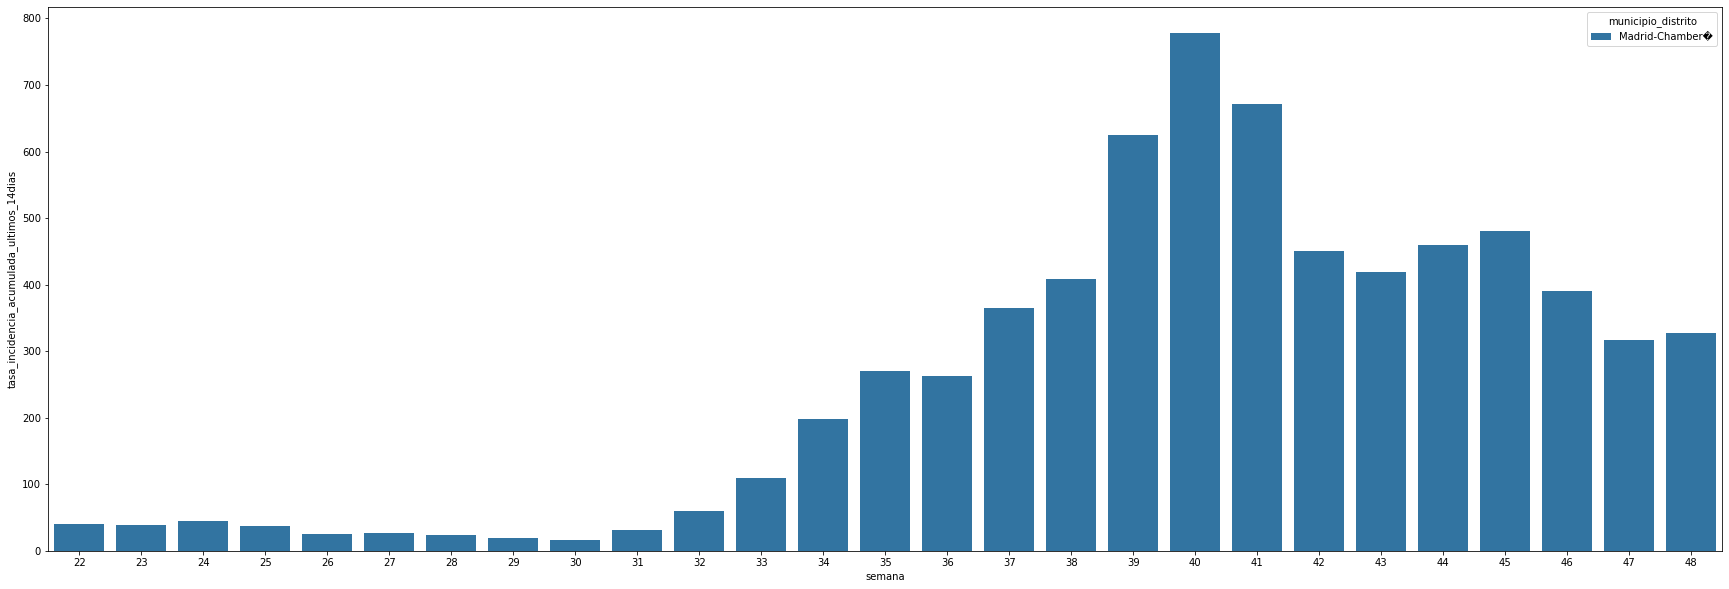

In [40]:
plt.figure(figsize = [30,10]) 
sns.barplot(x = 'semana',
            y = 'tasa_incidencia_acumulada_ultimos_14dias',
            hue = 'municipio_distrito',
            data = Madrid_Chamberi,
            palette='tab10')

#### 'Madrid-Fuencarral-El Pardo'

In [41]:
Madrid_Fuencarral_ElPardo = incidencia_14_top_distritos[incidencia_14_top_distritos['municipio_distrito'] == 'Madrid-Fuencarral-El Pardo']
Madrid_Fuencarral_ElPardo

,municipio_distrito,fecha_informe,semana,tasa_incidencia_acumulada_ultimos_14dias
7,Madrid-Fuencarral-El Pardo,2020-11-24 11:07:00,48,284.0
206,Madrid-Fuencarral-El Pardo,2020-11-17 12:22:00,47,256.0
405,Madrid-Fuencarral-El Pardo,2020-11-10 10:27:00,46,281.0
604,Madrid-Fuencarral-El Pardo,2020-11-03 10:02:00,45,317.0
803,Madrid-Fuencarral-El Pardo,2020-10-27 10:02:00,44,349.0
1002,Madrid-Fuencarral-El Pardo,2020-10-20 11:06:00,43,346.0
1201,Madrid-Fuencarral-El Pardo,2020-10-13 13:31:00,42,401.0
1400,Madrid-Fuencarral-El Pardo,2020-10-06 11:02:00,41,1159.0
1599,Madrid-Fuencarral-El Pardo,2020-09-29 11:15:00,40,1381.0
1798,Madrid-Fuencarral-El Pardo,2020-09-22 09:42:00,39,1395.0


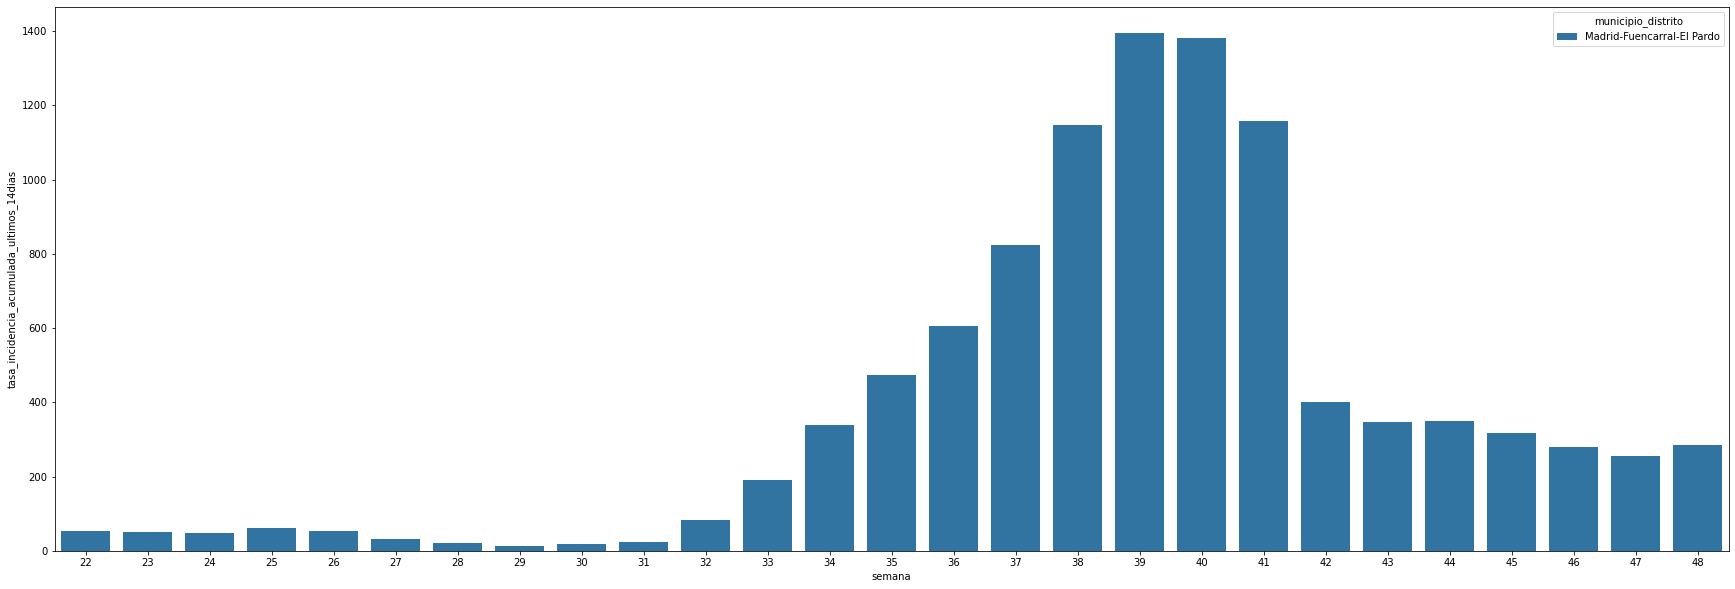

In [42]:
plt.figure(figsize = [30,10]) 
sns.barplot(x = 'semana',
            y = 'tasa_incidencia_acumulada_ultimos_14dias',
            hue = 'municipio_distrito',
            data = Madrid_Fuencarral_ElPardo,
            palette='tab10')

#### 'Madrid-Moncloa-Aravaca'

In [43]:
Madrid_Aravaca = incidencia_14_top_distritos[incidencia_14_top_distritos['municipio_distrito'] == 'Madrid-Moncloa-Aravaca']
Madrid_Aravaca

,municipio_distrito,fecha_informe,semana,tasa_incidencia_acumulada_ultimos_14dias
8,Madrid-Moncloa-Aravaca,2020-11-24 11:07:00,48,337.0
207,Madrid-Moncloa-Aravaca,2020-11-17 12:22:00,47,298.0
406,Madrid-Moncloa-Aravaca,2020-11-10 10:27:00,46,363.0
605,Madrid-Moncloa-Aravaca,2020-11-03 10:02:00,45,458.0
804,Madrid-Moncloa-Aravaca,2020-10-27 10:02:00,44,597.0
1003,Madrid-Moncloa-Aravaca,2020-10-20 11:06:00,43,597.0
1202,Madrid-Moncloa-Aravaca,2020-10-13 13:31:00,42,495.0
1401,Madrid-Moncloa-Aravaca,2020-10-06 11:02:00,41,603.0
1600,Madrid-Moncloa-Aravaca,2020-09-29 11:15:00,40,698.0
1799,Madrid-Moncloa-Aravaca,2020-09-22 09:42:00,39,602.0


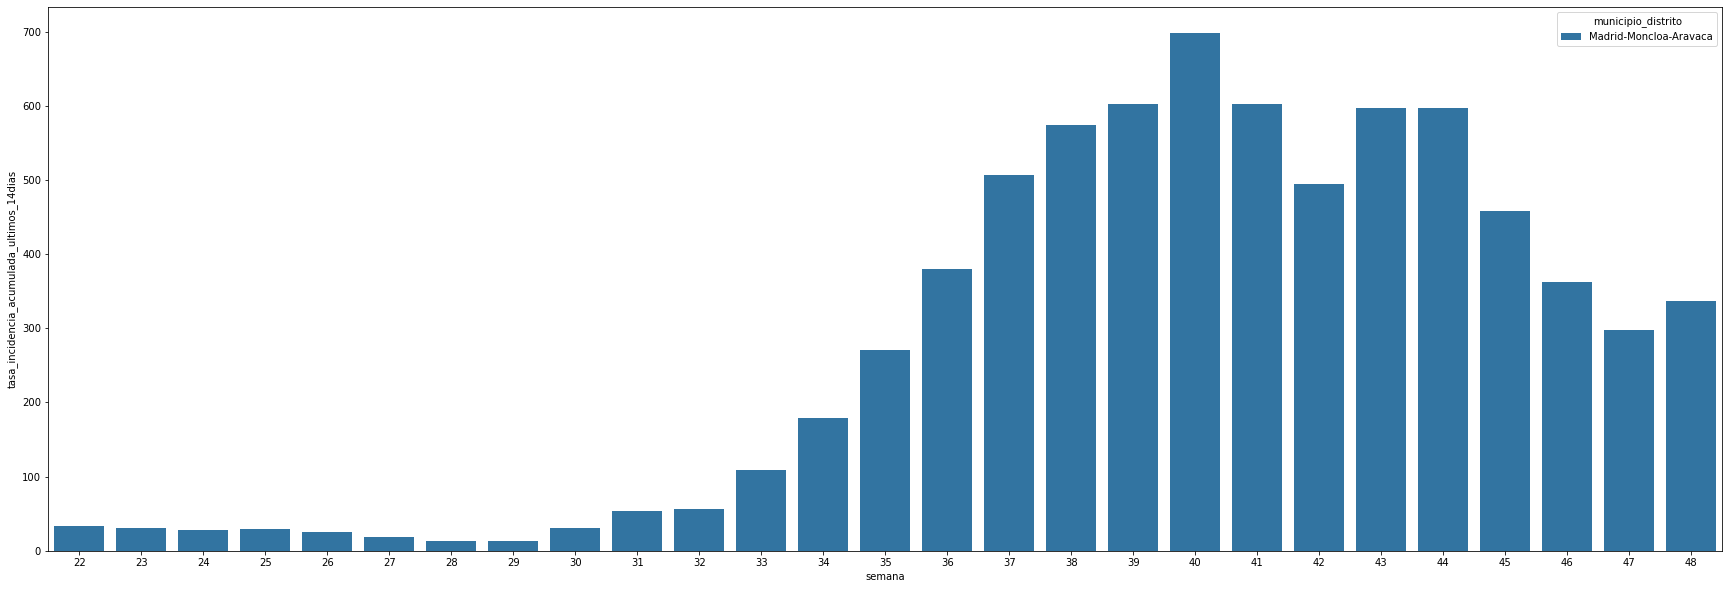

In [44]:
plt.figure(figsize = [30,10]) 
sns.barplot(x = 'semana',
            y = 'tasa_incidencia_acumulada_ultimos_14dias',
            hue = 'municipio_distrito',
            data = Madrid_Aravaca,
            palette='tab10')

#### 'Madrid-Latina'

In [45]:
Madrid_Latina = incidencia_14_top_distritos[incidencia_14_top_distritos['municipio_distrito'] == 'Madrid-Latina']
Madrid_Latina 

,municipio_distrito,fecha_informe,semana,tasa_incidencia_acumulada_ultimos_14dias
9,Madrid-Latina,2020-11-24 11:07:00,48,224.0
208,Madrid-Latina,2020-11-17 12:22:00,47,238.0
407,Madrid-Latina,2020-11-10 10:27:00,46,280.0
606,Madrid-Latina,2020-11-03 10:02:00,45,307.0
805,Madrid-Latina,2020-10-27 10:02:00,44,317.0
1004,Madrid-Latina,2020-10-20 11:06:00,43,375.0
1203,Madrid-Latina,2020-10-13 13:31:00,42,423.0
1402,Madrid-Latina,2020-10-06 11:02:00,41,1376.0
1601,Madrid-Latina,2020-09-29 11:15:00,40,1828.0
1800,Madrid-Latina,2020-09-22 09:42:00,39,1522.0


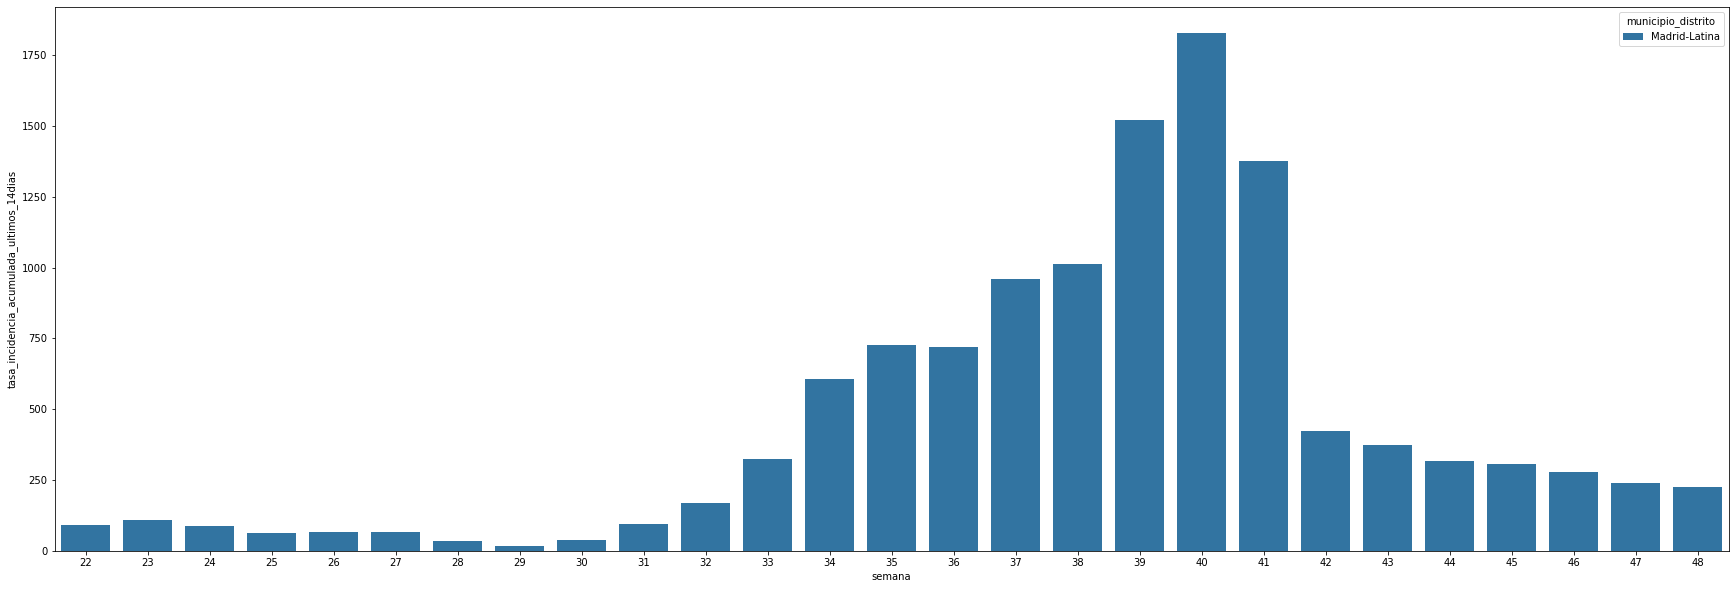

In [46]:
plt.figure(figsize = [30,10]) 
sns.barplot(x = 'semana',
            y = 'tasa_incidencia_acumulada_ultimos_14dias',
            hue = 'municipio_distrito',
            data = Madrid_Latina,
            palette='tab10')

#### Madrid-Carabanchel'

In [47]:
Madrid_Carabanchel = incidencia_14_top_distritos[incidencia_14_top_distritos['municipio_distrito'] == 'Madrid-Carabanchel']
Madrid_Carabanchel 

,municipio_distrito,fecha_informe,semana,tasa_incidencia_acumulada_ultimos_14dias
10,Madrid-Carabanchel,2020-11-24 11:07:00,48,261.0
209,Madrid-Carabanchel,2020-11-17 12:22:00,47,279.0
408,Madrid-Carabanchel,2020-11-10 10:27:00,46,293.0
607,Madrid-Carabanchel,2020-11-03 10:02:00,45,317.0
806,Madrid-Carabanchel,2020-10-27 10:02:00,44,340.0
1005,Madrid-Carabanchel,2020-10-20 11:06:00,43,399.0
1204,Madrid-Carabanchel,2020-10-13 13:31:00,42,489.0
1403,Madrid-Carabanchel,2020-10-06 11:02:00,41,1816.0
1602,Madrid-Carabanchel,2020-09-29 11:15:00,40,2431.0
1801,Madrid-Carabanchel,2020-09-22 09:42:00,39,2496.0


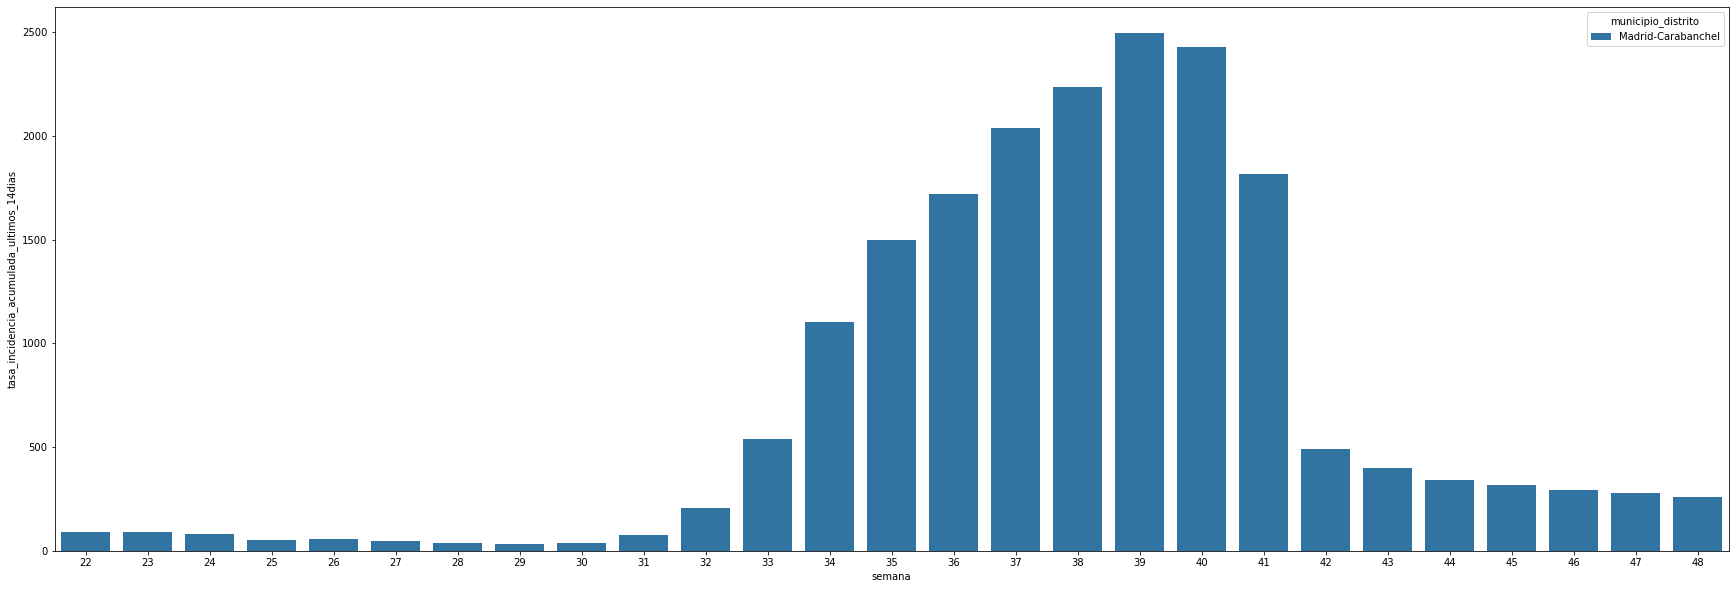

In [48]:
plt.figure(figsize = [30,10]) 
sns.barplot(x = 'semana',
            y = 'tasa_incidencia_acumulada_ultimos_14dias',
            hue = 'municipio_distrito',
            data = Madrid_Carabanchel ,
            palette='tab10')

#### 'Madrid-Puente de Vallecas'

In [49]:
Madrid_Vallecas = incidencia_14_top_distritos[incidencia_14_top_distritos['municipio_distrito'] == 'Madrid-Puente de Vallecas']
Madrid_Vallecas

,municipio_distrito,fecha_informe,semana,tasa_incidencia_acumulada_ultimos_14dias
12,Madrid-Puente de Vallecas,2020-11-24 11:07:00,48,285.0
211,Madrid-Puente de Vallecas,2020-11-17 12:22:00,47,327.0
410,Madrid-Puente de Vallecas,2020-11-10 10:27:00,46,345.0
609,Madrid-Puente de Vallecas,2020-11-03 10:02:00,45,395.0
808,Madrid-Puente de Vallecas,2020-10-27 10:02:00,44,473.0
1007,Madrid-Puente de Vallecas,2020-10-20 11:06:00,43,511.0
1206,Madrid-Puente de Vallecas,2020-10-13 13:31:00,42,623.0
1405,Madrid-Puente de Vallecas,2020-10-06 11:02:00,41,2239.0
1604,Madrid-Puente de Vallecas,2020-09-29 11:15:00,40,2785.0
1803,Madrid-Puente de Vallecas,2020-09-22 09:42:00,39,2988.0


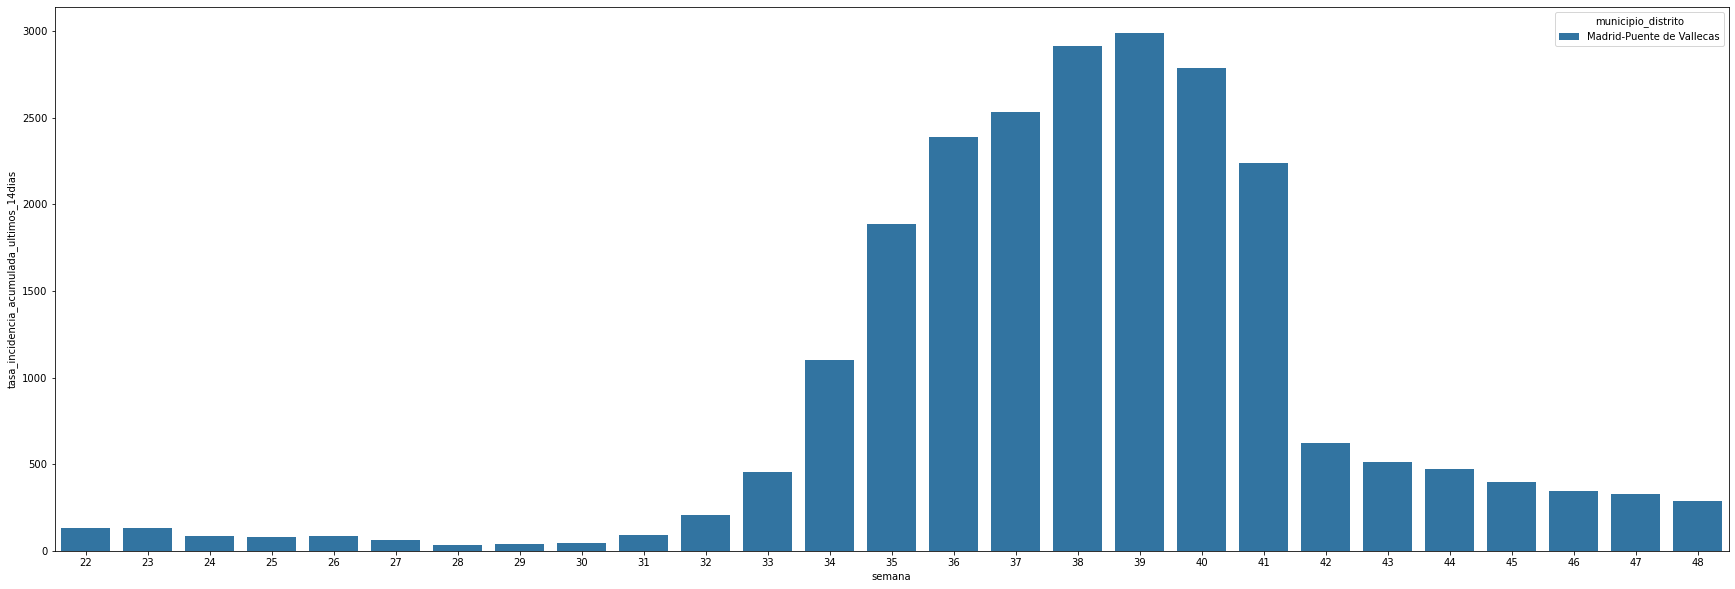

In [50]:
plt.figure(figsize = [30,10]) 
sns.barplot(x = 'semana',
            y = 'tasa_incidencia_acumulada_ultimos_14dias',
            hue = 'municipio_distrito',
            data = Madrid_Vallecas ,
            palette='tab10')

#### 'Madrid-Ciudad Lineal'

In [51]:
Madrid_Ciudad_lineal = incidencia_14_top_distritos[incidencia_14_top_distritos['municipio_distrito'] == 'Madrid-Ciudad Lineal']
Madrid_Ciudad_lineal

,municipio_distrito,fecha_informe,semana,tasa_incidencia_acumulada_ultimos_14dias
16,Madrid-Ciudad Lineal,2020-11-24 11:07:00,48,279.0
215,Madrid-Ciudad Lineal,2020-11-17 12:22:00,47,316.0
414,Madrid-Ciudad Lineal,2020-11-10 10:27:00,46,376.0
613,Madrid-Ciudad Lineal,2020-11-03 10:02:00,45,381.0
812,Madrid-Ciudad Lineal,2020-10-27 10:02:00,44,417.0
1011,Madrid-Ciudad Lineal,2020-10-20 11:06:00,43,418.0
1210,Madrid-Ciudad Lineal,2020-10-13 13:31:00,42,397.0
1409,Madrid-Ciudad Lineal,2020-10-06 11:02:00,41,1227.0
1608,Madrid-Ciudad Lineal,2020-09-29 11:15:00,40,1761.0
1807,Madrid-Ciudad Lineal,2020-09-22 09:42:00,39,2112.0


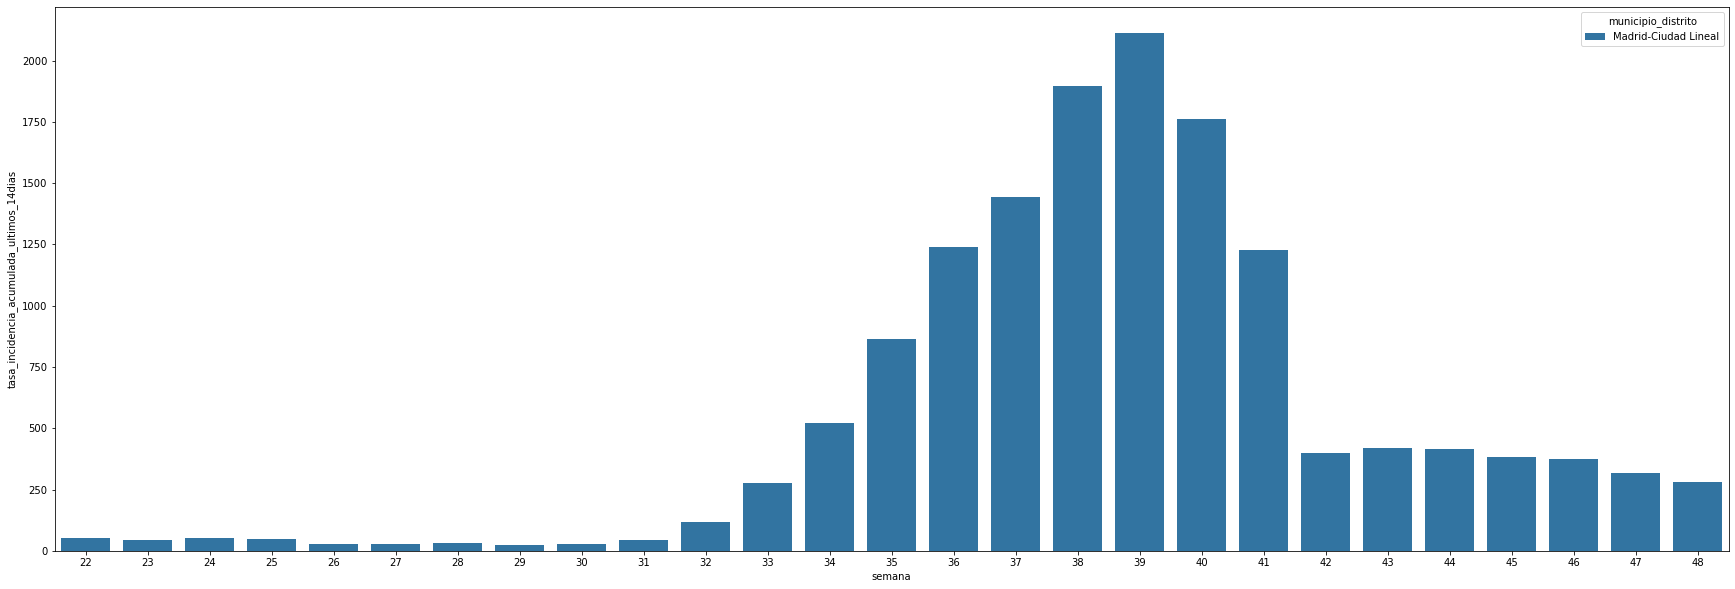

In [52]:
plt.figure(figsize = [30,10]) 
sns.barplot(x = 'semana',
            y = 'tasa_incidencia_acumulada_ultimos_14dias',
            hue = 'municipio_distrito',
            data = Madrid_Ciudad_lineal ,
            palette='tab10')

#### 'Madrid-Hortaleza'

In [53]:
Madrid_Hortaleza = incidencia_14_top_distritos[incidencia_14_top_distritos['municipio_distrito'] == 'Madrid-Hortaleza']
Madrid_Hortaleza

,municipio_distrito,fecha_informe,semana,tasa_incidencia_acumulada_ultimos_14dias
17,Madrid-Hortaleza,2020-11-24 11:07:00,48,295.0
216,Madrid-Hortaleza,2020-11-17 12:22:00,47,306.0
415,Madrid-Hortaleza,2020-11-10 10:27:00,46,292.0
614,Madrid-Hortaleza,2020-11-03 10:02:00,45,303.0
813,Madrid-Hortaleza,2020-10-27 10:02:00,44,356.0
1012,Madrid-Hortaleza,2020-10-20 11:06:00,43,342.0
1211,Madrid-Hortaleza,2020-10-13 13:31:00,42,406.0
1410,Madrid-Hortaleza,2020-10-06 11:02:00,41,869.0
1609,Madrid-Hortaleza,2020-09-29 11:15:00,40,931.0
1808,Madrid-Hortaleza,2020-09-22 09:42:00,39,962.0


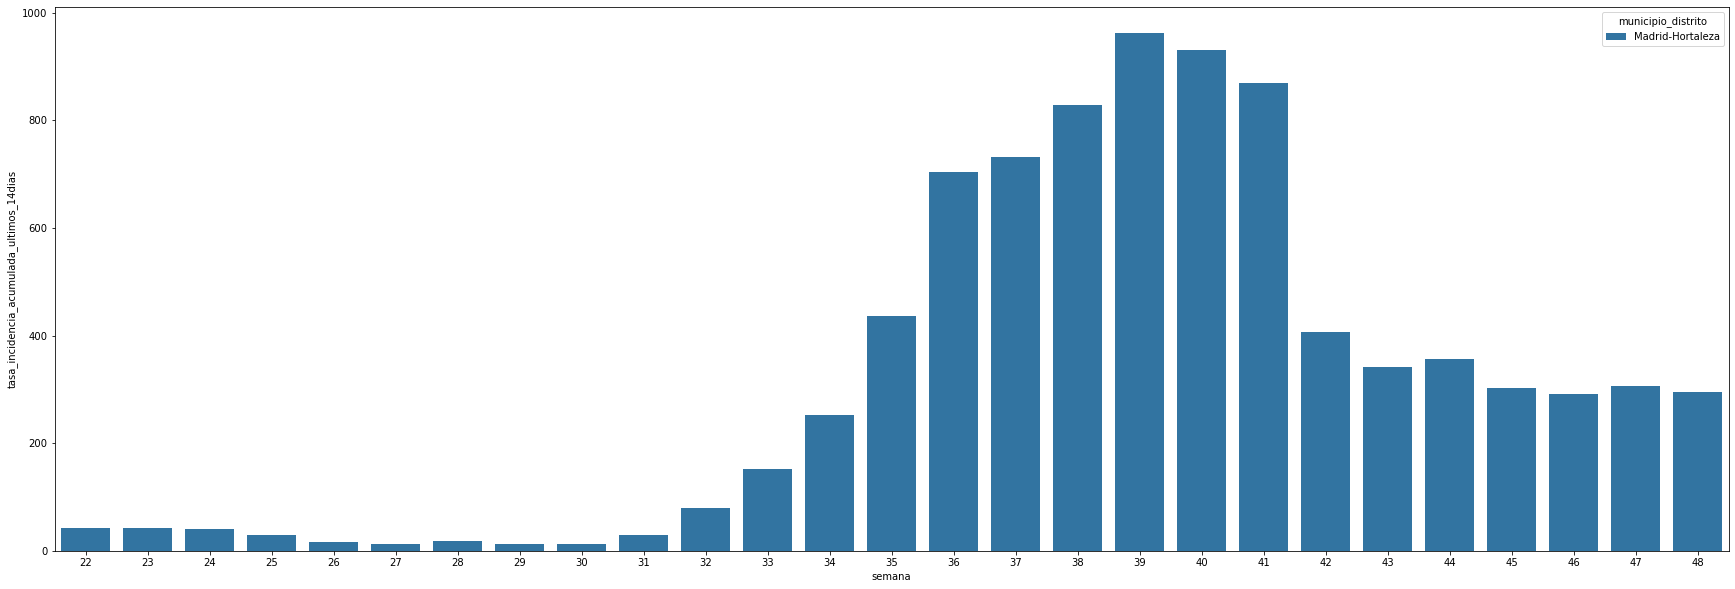

In [54]:
plt.figure(figsize = [30,10]) 
sns.barplot(x = 'semana',
            y = 'tasa_incidencia_acumulada_ultimos_14dias',
            hue = 'municipio_distrito',
            data = Madrid_Hortaleza ,
            palette='tab10')

#### 'Madrid-Villaverde'

In [55]:
Madrid_Villaverde = incidencia_14_top_distritos[incidencia_14_top_distritos['municipio_distrito'] == 'Madrid-Villaverde']
Madrid_Villaverde

,municipio_distrito,fecha_informe,semana,tasa_incidencia_acumulada_ultimos_14dias
18,Madrid-Villaverde,2020-11-24 11:07:00,48,263.0
217,Madrid-Villaverde,2020-11-17 12:22:00,47,260.0
416,Madrid-Villaverde,2020-11-10 10:27:00,46,292.0
615,Madrid-Villaverde,2020-11-03 10:02:00,45,326.0
814,Madrid-Villaverde,2020-10-27 10:02:00,44,391.0
1013,Madrid-Villaverde,2020-10-20 11:06:00,43,469.0
1212,Madrid-Villaverde,2020-10-13 13:31:00,42,614.0
1411,Madrid-Villaverde,2020-10-06 11:02:00,41,1256.0
1610,Madrid-Villaverde,2020-09-29 11:15:00,40,1498.0
1809,Madrid-Villaverde,2020-09-22 09:42:00,39,1679.0


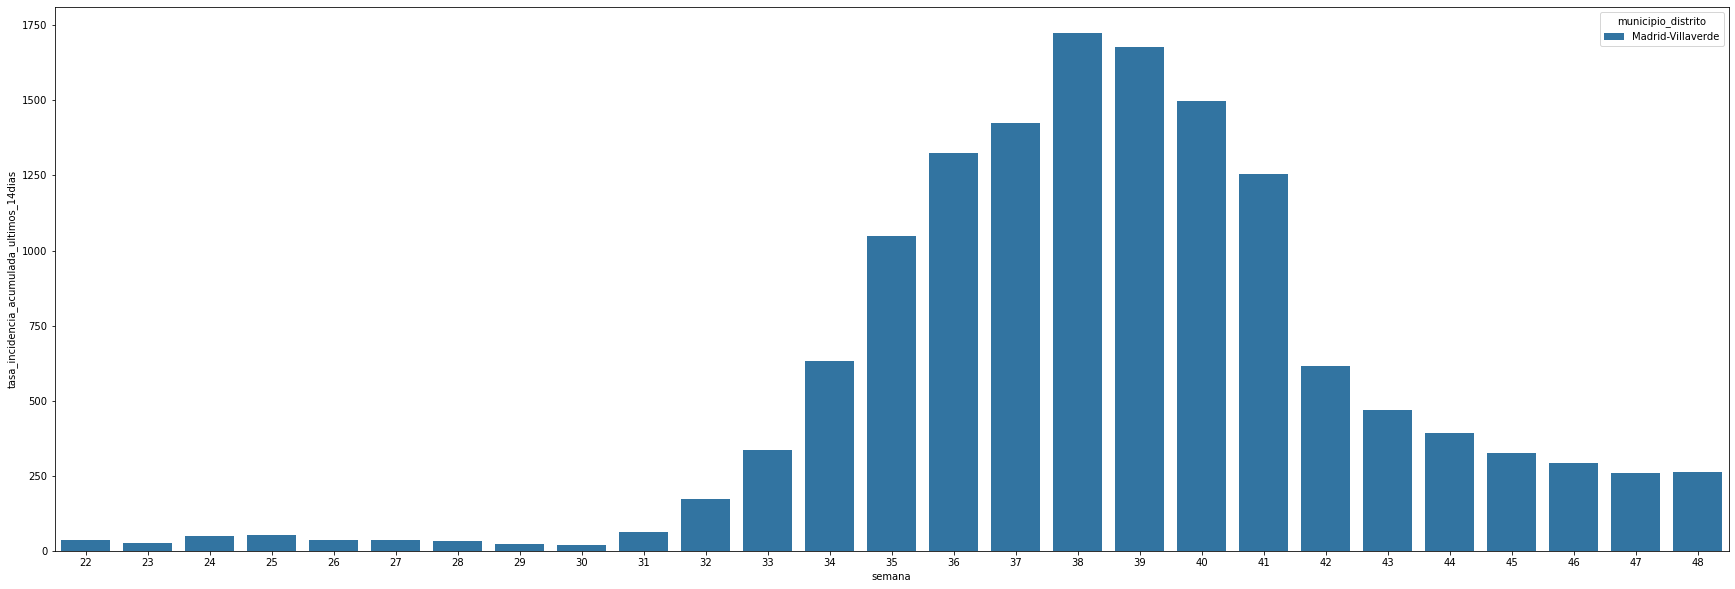

In [56]:
plt.figure(figsize = [30,10]) 
sns.barplot(x = 'semana',
            y = 'tasa_incidencia_acumulada_ultimos_14dias',
            hue = 'municipio_distrito',
            data = Madrid_Villaverde ,
            palette='tab10')

#### 'Fuenlabrada'

In [57]:
Fuenlabrada = incidencia_14_top_distritos[incidencia_14_top_distritos['municipio_distrito'] == 'Fuenlabrada']
Fuenlabrada



,municipio_distrito,fecha_informe,semana,tasa_incidencia_acumulada_ultimos_14dias
59,Fuenlabrada,2020-11-24 11:07:00,48,356.0
256,Fuenlabrada,2020-11-17 12:22:00,47,344.0
455,Fuenlabrada,2020-11-10 10:27:00,46,334.0
654,Fuenlabrada,2020-11-03 10:02:00,45,343.0
853,Fuenlabrada,2020-10-27 10:02:00,44,385.0
1052,Fuenlabrada,2020-10-20 11:06:00,43,365.0
1250,Fuenlabrada,2020-10-13 13:31:00,42,454.0
1450,Fuenlabrada,2020-10-06 11:02:00,41,1482.0
1649,Fuenlabrada,2020-09-29 11:15:00,40,2258.0
1848,Fuenlabrada,2020-09-22 09:42:00,39,1876.0


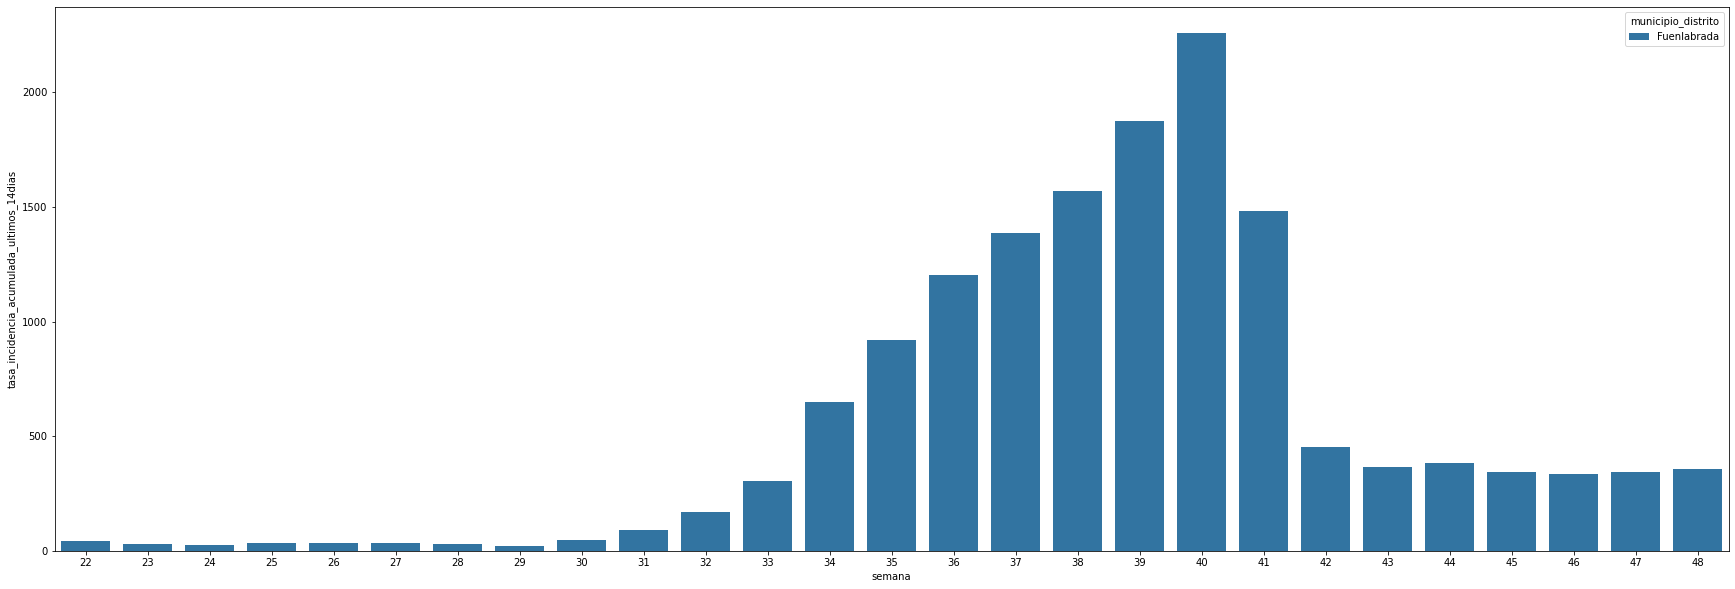

In [58]:
plt.figure(figsize = [30,10]) 
sns.barplot(x = 'semana',
            y = 'tasa_incidencia_acumulada_ultimos_14dias',
            hue = 'municipio_distrito',
            data = Fuenlabrada ,
            palette='tab10')

#### 'M�stoles'

In [59]:
Mostoles = incidencia_14_top_distritos[incidencia_14_top_distritos['municipio_distrito'] == 'M�stoles']
Mostoles

,municipio_distrito,fecha_informe,semana,tasa_incidencia_acumulada_ultimos_14dias
79,M�stoles,2020-11-24 11:07:00,48,312.0
276,M�stoles,2020-11-17 12:22:00,47,281.0
475,M�stoles,2020-11-10 10:27:00,46,295.0
674,M�stoles,2020-11-03 10:02:00,45,354.0
873,M�stoles,2020-10-27 10:02:00,44,386.0
1072,M�stoles,2020-10-20 11:06:00,43,346.0
1270,M�stoles,2020-10-13 13:31:00,42,377.0
1470,M�stoles,2020-10-06 11:02:00,41,972.0
1669,M�stoles,2020-09-29 11:15:00,40,1316.0
1867,M�stoles,2020-09-22 09:42:00,39,1260.0


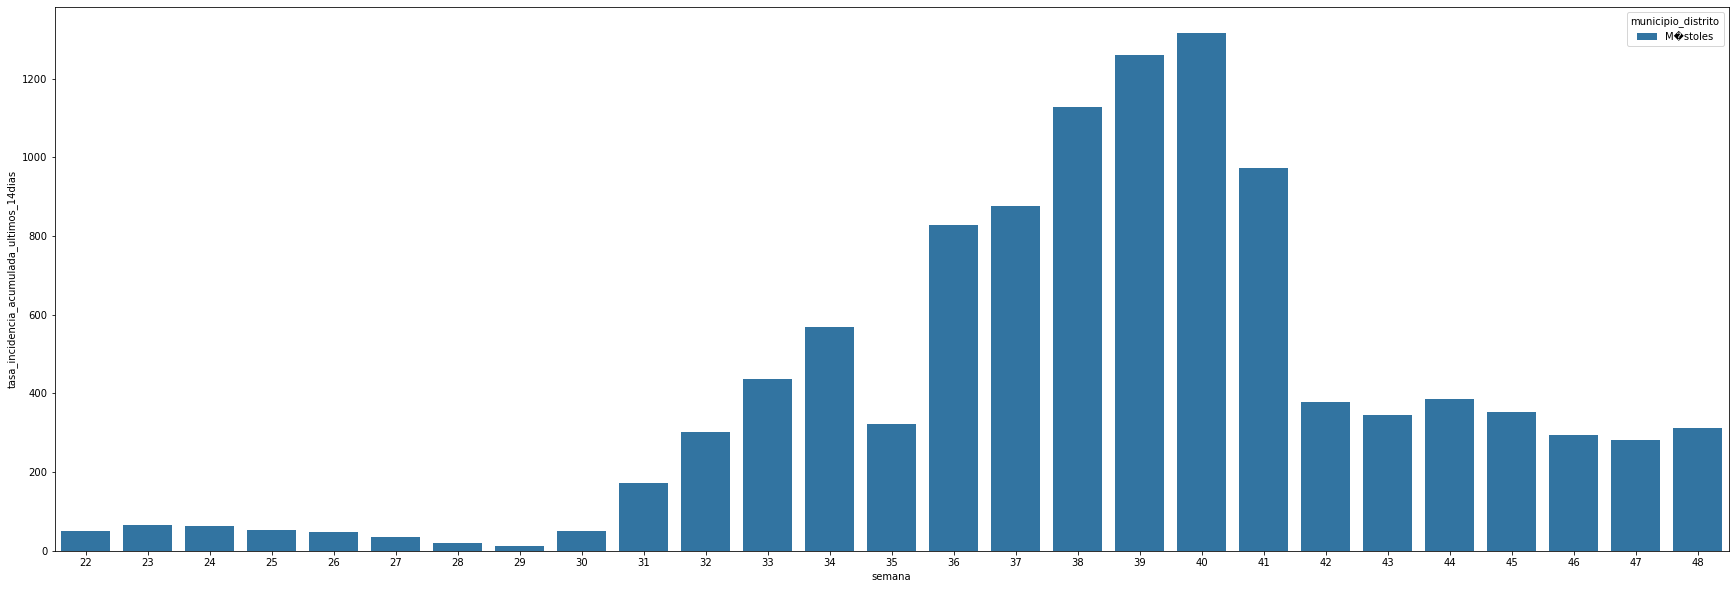

In [60]:
plt.figure(figsize = [30,10]) 
sns.barplot(x = 'semana',
            y = 'tasa_incidencia_acumulada_ultimos_14dias',
            hue = 'municipio_distrito',
            data = Mostoles ,
            palette='tab10')

#### 'Alcal� de Henares'

In [61]:
Alcala_Henares = incidencia_14_top_distritos[incidencia_14_top_distritos['municipio_distrito'] == 'Alcal� de Henares']
Alcala_Henares

,municipio_distrito,fecha_informe,semana,tasa_incidencia_acumulada_ultimos_14dias
178,Alcal� de Henares,2020-11-24 11:07:00,48,159.0
374,Alcal� de Henares,2020-11-17 12:22:00,47,182.0
573,Alcal� de Henares,2020-11-10 10:27:00,46,199.0
772,Alcal� de Henares,2020-11-03 10:02:00,45,251.0
971,Alcal� de Henares,2020-10-27 10:02:00,44,350.0
1169,Alcal� de Henares,2020-10-20 11:06:00,43,314.0
1367,Alcal� de Henares,2020-10-13 13:31:00,42,312.0
1566,Alcal� de Henares,2020-10-06 11:02:00,41,777.0
1765,Alcal� de Henares,2020-09-29 11:15:00,40,1027.0
1963,Alcal� de Henares,2020-09-22 09:42:00,39,1018.0


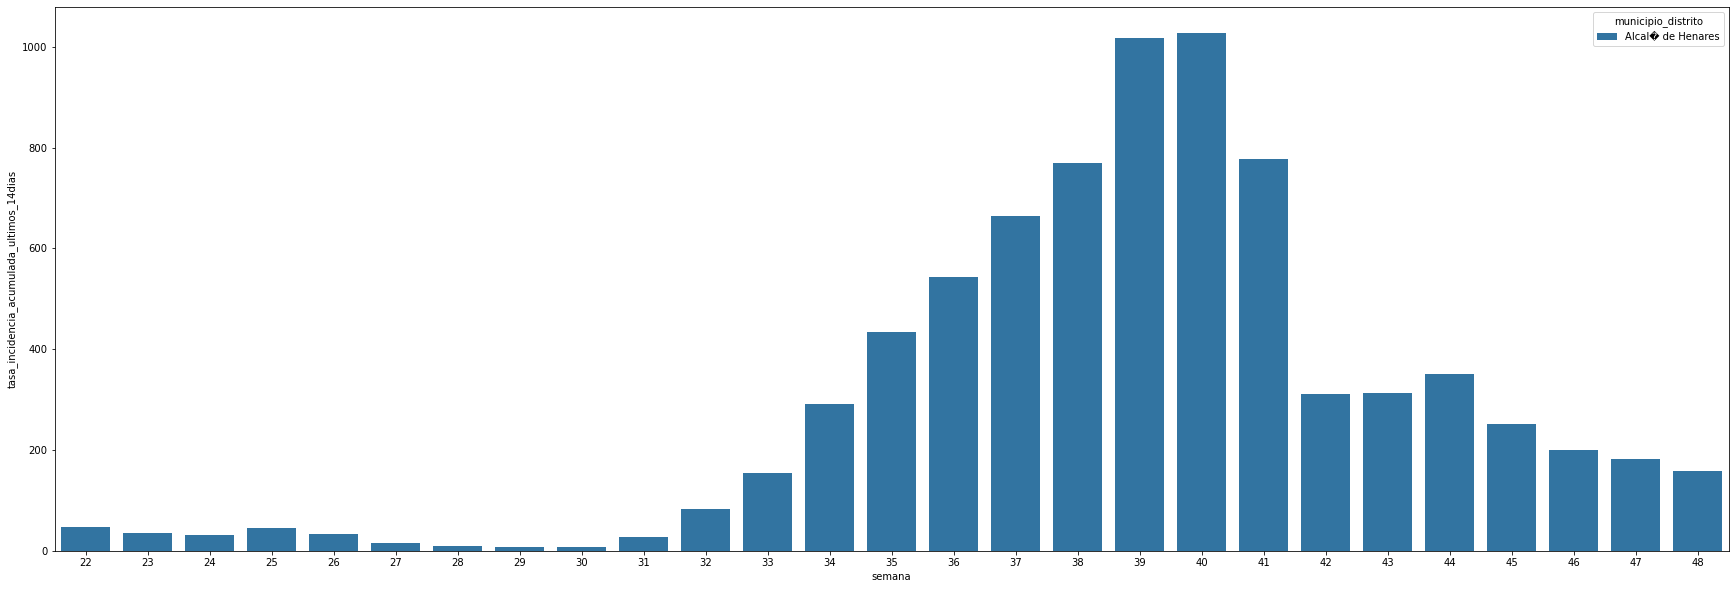

In [62]:
plt.figure(figsize = [30,10]) 
sns.barplot(x = 'semana',
            y = 'tasa_incidencia_acumulada_ultimos_14dias',
            hue = 'municipio_distrito',
            data = Alcala_Henares ,
            palette='tab10')

## Gráfico de los casos totales por semana

In [63]:
# Creo un Df con los dato totales
Casos_totales = datos[['municipio_distrito','casos_confirmados_totales','semana']]
Casos_totales

,municipio_distrito,casos_confirmados_totales,semana
0,Madrid-Retiro,95.0,48
1,Madrid-Salamanca,48.0,48
2,Madrid-Centro,24.0,48
3,Madrid-Arganzuela,41.0,48
4,Madrid-Chamart�n,2.0,48
...,...,...,...
5340,Getafe,72.0,22
5341,Ribatejada,NaN,22
5342,Villaconejos,9.0,22
5343,Valdetorres de Jarama,24.0,22


In [64]:
# Convierto los nulos en 0, asumo que no hay casos
Casos_totales['casos_confirmados_totales'].fillna(0, inplace=True)
Casos_totales.isna().sum()

municipio_distrito           0
casos_confirmados_totales    0
semana                       0
dtype: int64

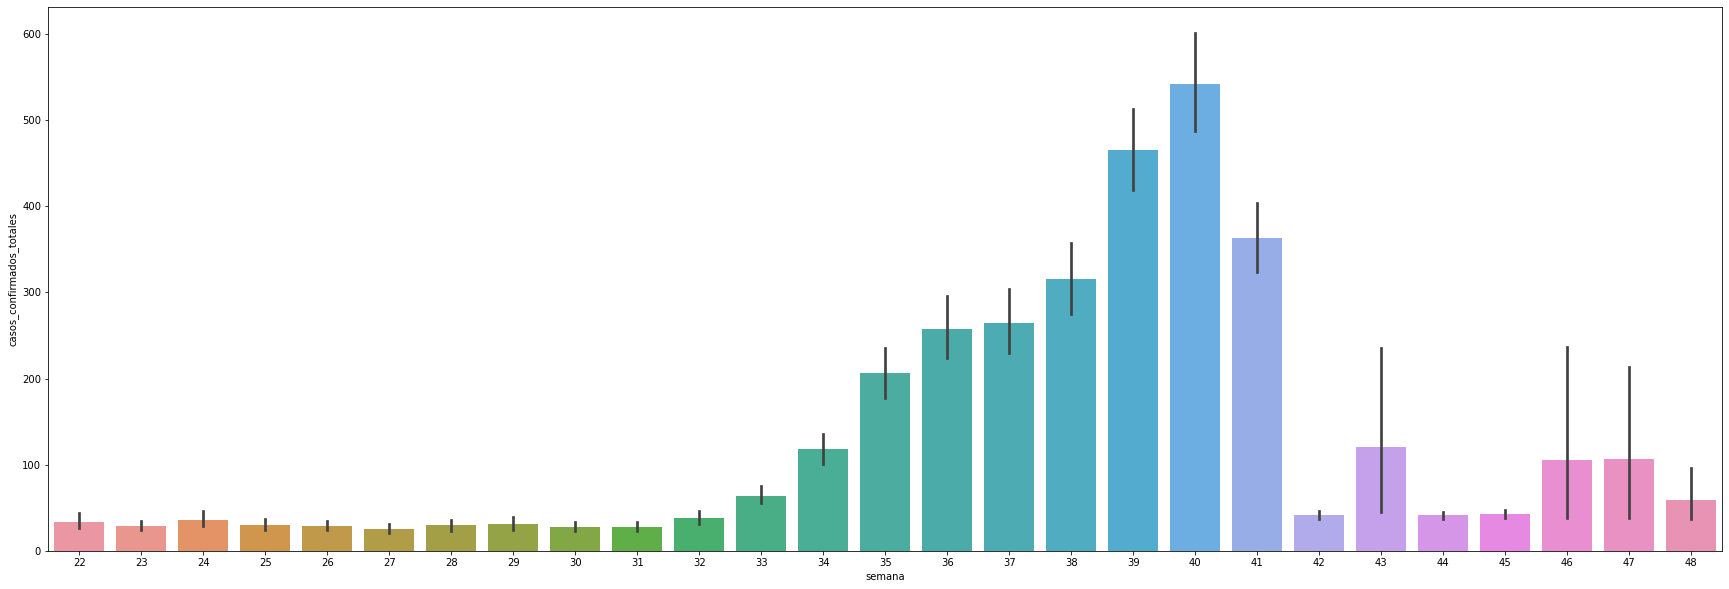

In [65]:
plt.figure(figsize = [30,10]) 
sns.barplot(x = 'semana',
            y = 'casos_confirmados_totales',
            data = Casos_totales)

In [ ]:
AL revisar los casos totales se observa una tendencia similar a la de la incidencia a 14 días. Pico en la semana 40 (en algunos distritos se debió dar algo antes y otros algo después) y un descenso fuerte de casos en la seman 42. Ahí ehmos observado como en todos los distritos hay un descenso pronunciado y a partir de ahí una estabilización de casoso y/o un ligero descenso.